# 0. ETF Selection

We select the SPDR Gold Shares (GLD) ETF as the gold ETF. It is traded on Nasdaq, the currency is USD.

Similarly, we choose the Amundi CAC 40 UCITS ETF-C (C40.PA) as the equity ETF. It will track the CAC 40 index of France. It is traded on Paris Euronext, the currency is EUR.

Data source: https://finance.yahoo.com/

### 1. Data importing

In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from nelson_siegel_svensson import NelsonSiegelSvenssonCurve, NelsonSiegelCurve
from nelson_siegel_svensson.calibrate import calibrate_ns_ols, calibrate_nss_ols
%matplotlib inline

# 1.1 gold ETF prices for the month of October 2019 and November 2019
Gold_Shares_df = pd.read_csv("data/SPDR_Gold_Shares_USD.csv")
# 1.2 equity ETF price for the months of October 2019 and November 2019
equity_df = pd.read_csv("data/C40.PA.csv")
# 1.3
treasury_Yield_df = pd.read_csv('data/Treasury_Yield.csv')

### 2.0

In [2]:
equity_df['Daily_return_pct'] = equity_df['Close'].pct_change(1)
print(equity_df)

          Date       Open       High        Low      Close  Adj Close  Volume  \
0   2019-10-01  83.650002  83.650002  81.970001  81.989998  81.989998       0   
1   2019-10-02  82.019997  82.019997  79.459999  79.500000  79.500000       0   
2   2019-10-03  79.500000  79.500000  79.500000  79.500000  79.500000       0   
3   2019-10-04  79.989998  80.699997  79.830002  80.699997  80.699997       0   
4   2019-10-07  80.599998  81.320000  80.379997  81.320000  81.320000       0   
5   2019-10-08  81.290001  81.290001  80.209999  80.510002  80.510002       0   
6   2019-10-09  80.459999  80.970001  80.430000  80.879997  80.879997       0   
7   2019-10-10  80.760002  81.889999  80.760002  81.570000  81.570000       0   
8   2019-10-11  81.970001  83.190002  81.970001  83.190002  83.190002       0   
9   2019-10-14  82.980003  83.059998  82.500000  82.930000  82.930000       0   
10  2019-10-15  83.339996  84.059998  83.230003  83.959999  83.959999       0   
11  2019-10-16  83.889999  8

### 3.0

In [3]:
# 3.1
df_Oct = treasury_Yield_df[treasury_Yield_df['Date'].str.contains("Oct")]
average_yield_Oct = np.mean(df_Oct)
print("Average October Yield is {}\n".format(average_yield_Oct))

df_Nov = treasury_Yield_df[treasury_Yield_df['Date'].str.contains("Nov")]
average_yield_Nov = np.mean(df_Nov)
print("Average November Yield is {}".format(average_yield_Nov))

Average October Yield is  2 Year Price    1.551385
3 Year Price     1.527154
5 Year Price     1.525115
7 Year Price     1.614000
10 Year Price    1.701423
30 Year Price    2.187269
dtype: float64

Average November Yield is  2 Year Price    1.616750
3 Year Price     1.618042
5 Year Price     1.641167
7 Year Price     1.736833
10 Year Price    1.811625
30 Year Price    2.276708
dtype: float64


In [4]:
#3.2
df1_Oct = Gold_Shares_df[Gold_Shares_df['Date'].str.contains("2019-10")]
average_price_Oct = np.mean(df1_Oct)
print("Average October Price for Gold_Shares is {}\n".format(average_price_Oct))

df1_Nov = Gold_Shares_df[Gold_Shares_df['Date'].str.contains("2019-11")]
average_price_Nov = np.mean(df1_Nov)
print("Average November Price for Gold_Shares  is {}".format(average_price_Nov))

Average October Price for Gold_Shares is Open         1.408474e+02
High         1.413843e+02
Low          1.403030e+02
Close        1.408748e+02
Adj Close    1.408748e+02
Volume       7.757257e+06
dtype: float64

Average November Price for Gold_Shares  is Open         1.386115e+02
High         1.390560e+02
Low          1.380835e+02
Close        1.385705e+02
Adj Close    1.385705e+02
Volume       6.961465e+06
dtype: float64


In [5]:
#3.3

df2_Oct = equity_df[equity_df['Date'].str.contains("2019-10")]
average_equity_Oct = np.mean(df2_Oct)
print("Average October Equity is {}\n".format(average_equity_Oct))

df2_Nov = equity_df[equity_df['Date'].str.contains("2019-11")]
average_equity_Nov = np.mean(df2_Nov)
print("Average November Equity is {}".format(average_equity_Nov))

Average October Equity is Open                82.614347
High                82.982173
Low                 82.206957
Close               82.605217
Adj Close           82.605217
Volume               2.000000
Daily_return_pct     0.001231
dtype: float64

Average November Equity is Open                86.528572
High                86.829047
Low                 86.366668
Close               86.626191
Adj Close           86.626191
Volume               4.857143
Daily_return_pct     0.001414
dtype: float64


In [6]:
#3.4
st_dev_Oct = np.std(df_Oct)
st_dev_NoV = np.std(df_Nov)
print("Standard Deviation for October Yield is {}\n".format(st_dev_Oct))
print("Standard Deviation for November Yield is {}".format(st_dev_NoV))

Standard Deviation for October Yield is  2 Year Price    0.079354
3 Year Price     0.094165
5 Year Price     0.101524
7 Year Price     0.098831
10 Year Price    0.102293
30 Year Price    0.101143
dtype: float64

Standard Deviation for November Yield is  2 Year Price    0.033516
3 Year Price     0.044156
5 Year Price     0.054878
7 Year Price     0.062000
10 Year Price    0.067403
30 Year Price    0.079564
dtype: float64


In [7]:
#3.5
st_dev_Oct = np.std(df1_Oct)
st_dev_NoV = np.std(df1_Nov)
print("Standard Deviation of October Price for Gold_Shares is {}\n".format(st_dev_Oct))
print("Standard Deviation of November Price for Gold_Shares is {}".format(st_dev_NoV))

Standard Deviation of October Price for Gold_Shares is Open         9.512410e-01
High         9.088824e-01
Low          9.297774e-01
Close        8.129583e-01
Adj Close    8.129583e-01
Volume       2.742686e+06
dtype: float64

Standard Deviation of November Price for Gold_Shares is Open         1.577261e+00
High         1.548053e+00
Low          1.545300e+00
Close        1.522541e+00
Adj Close    1.522541e+00
Volume       2.918340e+06
dtype: float64


In [8]:
#3.6
st_dev_Oct = np.std(df2_Oct)
st_dev_NoV = np.std(df2_Nov)
print("Standard Deviation for October Equity is {}\n".format(st_dev_Oct))
print("Standard Deviation for November Equity is {}".format(st_dev_NoV))

Standard Deviation for October Equity is Open                1.468829
High                1.400643
Low                 1.549271
Close               1.518592
Adj Close           1.518592
Volume              9.380832
Daily_return_pct    0.009843
dtype: float64

Standard Deviation for November Equity is Open                 0.725050
High                 0.648771
Low                  0.674547
Close                0.604093
Adj Close            0.604093
Volume              21.278842
Daily_return_pct     0.003933
dtype: float64


### 4.0

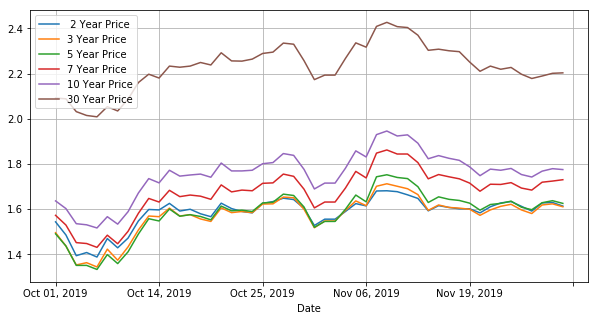

In [9]:
# 4.1
treasury_Yield_df.set_index('Date').plot(figsize=(10,5), grid=True)

Text(0, 0.5, 'Price')

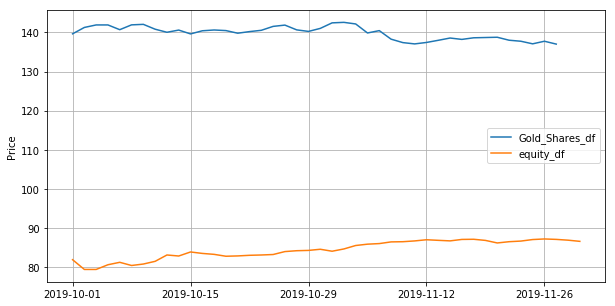

In [10]:
#4.2 and 4.3
end = datetime.now()
start = datetime(end.year-2, end.month, end.day)
#Gold_Shares_df,equity_df,treasury_Yield_df
#.set_index('Date')

# 1.1 gold ETF prices for the month of October 2019 and November 2019
# 1.2 equity ETF price for the months of October 2019 and November 2019

# Daily returns for Gold ETF and Equity ETF
Gold_Shares_df['Daily_return_pct'] = Gold_Shares_df['Close'].pct_change(1)
equity_df['Daily_return_pct'] = equity_df['Close'].pct_change(1)

df = pd.DataFrame({'Gold_Shares_df':Gold_Shares_df.set_index('Date')['Adj Close'],'equity_df':equity_df.set_index('Date')['Adj Close']})
df.head(2)
df.plot(figsize=(10,5), grid=True)
plt.ylabel('Price')      

NelsonSiegelSvenssonCurve(beta0=2.6460762928434245, beta1=-0.7093564825514909, beta2=-1.322216743950959, beta3=-2.063558217919096, tau1=1.6238459656556563, tau2=5.18025605440772)


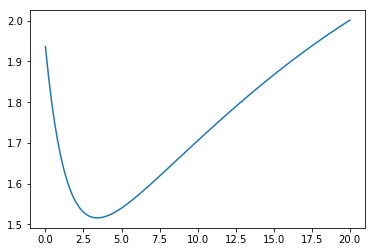

NelsonSiegelSvenssonCurve(beta0=168.6982397072671, beta1=-166.89395497946848, beta2=-65.12611950075515, beta3=-420.3717400228011, tau1=7.424003843688918, tau2=29.945471598381914)


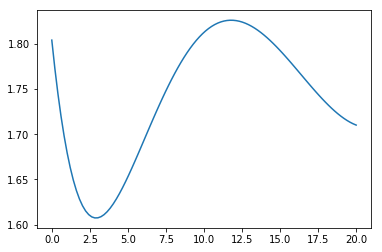

In [11]:
# 5.0

t =np.array([2.0,3.0,5.0,7.0,10.0,30.0])
#avarage yield rate for October 
y = np.array([1.551385,1.527154,1.525115,1.614000,1.701423,2.187269])

curve_fit, status = calibrate_nss_ols(t,y)
NSS_ZC = NelsonSiegelSvenssonCurve.zero(curve_fit,t)
NSS_ZC

Oct_curve, status = calibrate_nss_ols(t,NSS_ZC)
assert status.success
print(Oct_curve)

t = np.linspace(0,20,100)
plt.plot(t,Oct_curve(t))
plt.show()

#avarage yield rate for November 
t =np.array([2.0,3.0,5.0,7.0,10.0,30.0])
y = np.array([1.616750,1.618042,1.641167,1.736833,1.811625,2.276708])

curve_fit, status = calibrate_nss_ols(t,y)
NSS_ZC = NelsonSiegelSvenssonCurve.zero(curve_fit,t)
NSS_ZC

Nov_curve, status = calibrate_nss_ols(t,NSS_ZC)
assert status.success
print(Nov_curve)

t = np.linspace(0,20,100)
plt.plot(t,Nov_curve(t))
plt.show()

    